In [60]:
import pandas as pd

In [61]:
real_estate = pd.read_csv("Real_Estate.csv")
real_estate.head()


,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [62]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


The dataset contains 7 columns. Here’s a brief overview of the columns:

Transaction date: The date of the real estate transaction.
House age: Age of the house in years.
Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.
Number of convenience stores: Number of convenience stores in the vicinity.
Latitude: Latitude of the property location.
Longitude: Longitude of the property location.
House price of unit area: House price of unit area

In [64]:
real_estate.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [65]:
real_estate.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

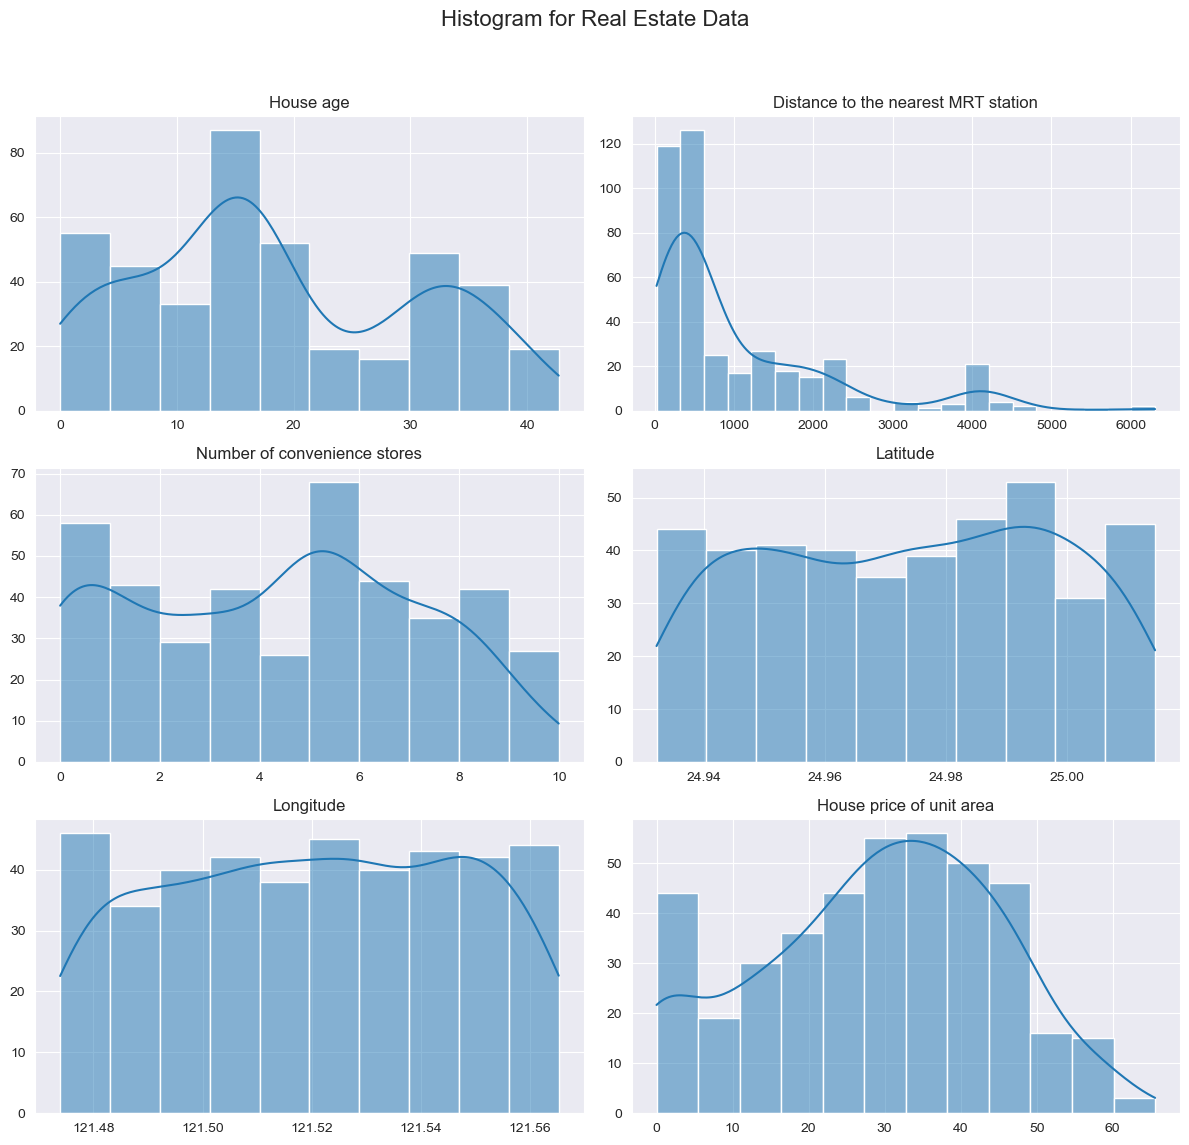

In [67]:
#set the aesthetic style of the plot
sns.set_style("darkgrid")

#create hsitogram for the numerical columns

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,12))
fig.suptitle ("Histogram for Real Estate Data", fontsize = 16)

cols = ["House age", "Distance to the nearest MRT station","Number of convenience stores","Latitude","Longitude","House price of unit area"]

for i, col in enumerate(cols):
    sns.histplot(real_estate[col], kde = True, ax = axes[i//2,i%2])
    axes[i//2,i%2].set_title(col)
    axes[i//2,i%2].set_xlabel("")
    axes[i//2,i%2].set_ylabel("")

plt.tight_layout(rect =[0,0.03,1,0.95])
plt.show()

                 
    


The histograms provide insights into the distribution of each variable:

House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).
Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.
Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.
Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.
House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase

Next, I’ll create scatter plots to explore the relationships between these variables and the house price. It will help us understand which factors might be influencing property prices more significantly

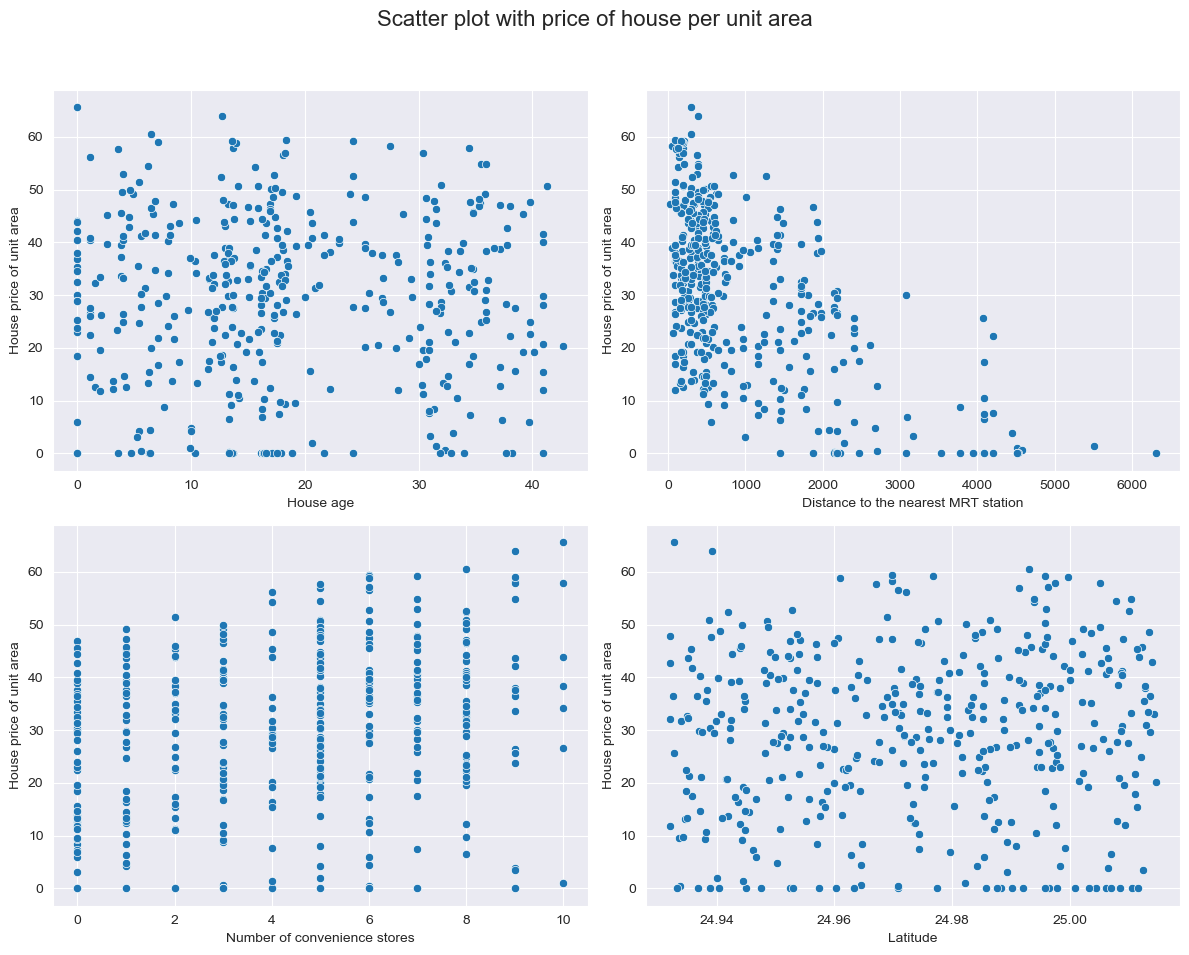

In [70]:
#scatter plot to show the relationship with house price
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12,10))
fig.suptitle("Scatter plot with price of house per unit area", fontsize = (16))

#scatter plot for each variable against the house price

sns.scatterplot(data = real_estate, x ="House age", y ="House price of unit area", ax =axes[0,0])
sns.scatterplot(data = real_estate, x ="Distance to the nearest MRT station", y = "House price of unit area", ax = axes[0,1])
sns.scatterplot(data = real_estate, x = "Number of convenience stores", y = "House price of unit area",ax = axes[1,0])
sns.scatterplot(data = real_estate, x = "Latitude", y = "House price of unit area", ax = axes[1,1])

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

The scatter plots revealed interesting relationships between various factors and house prices:

House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.
Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.
Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.
Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.

Finally, it would be beneficial to perform a correlation analysis to quantify the relationships between these variables, especially how each one correlates with the house price:

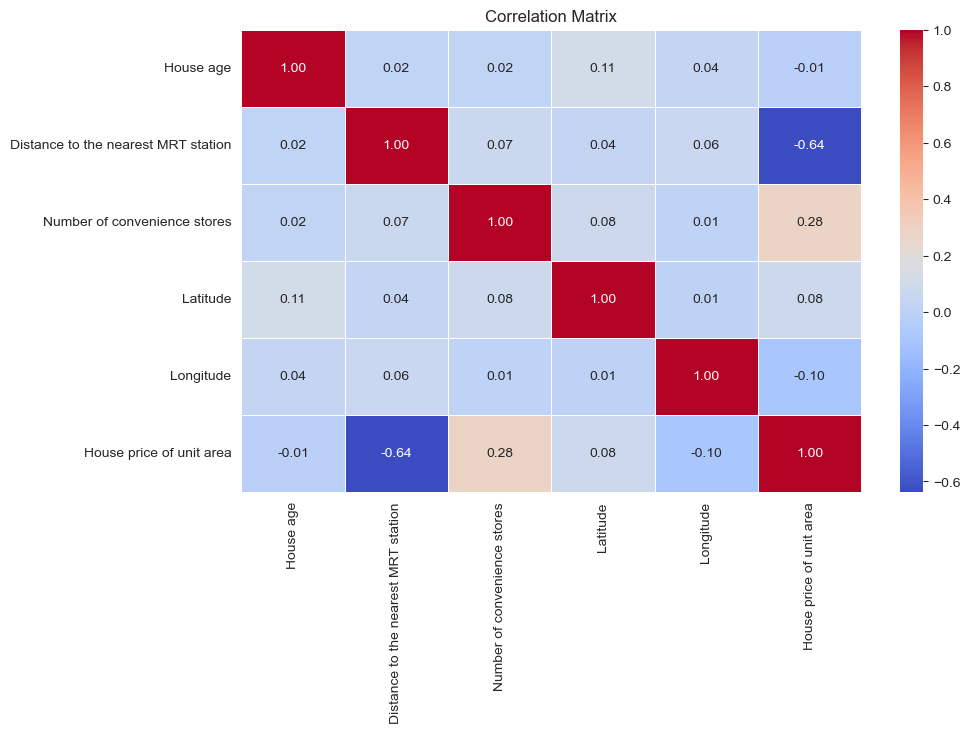

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [73]:
numeric_columns = real_estate.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = real_estate[numeric_columns].corr()


#Then, you can visualize the correlation matrix using a heatmap:


plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix")
plt.show()
print(correlation_matrix)



House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.
Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.
Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.
Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).
Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [76]:
#select features and target variable
features = ["Distance to the nearest MRT station","Number of convenience stores","Latitude","Longitude"]
target = "House price of unit area"
y = real_estate[target]
x = real_estate[features]

#spliting the dataset in to train test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

#model_initialization
model = LinearRegression ()

#train the model
model.fit(x_train,y_train)

LinearRegression()

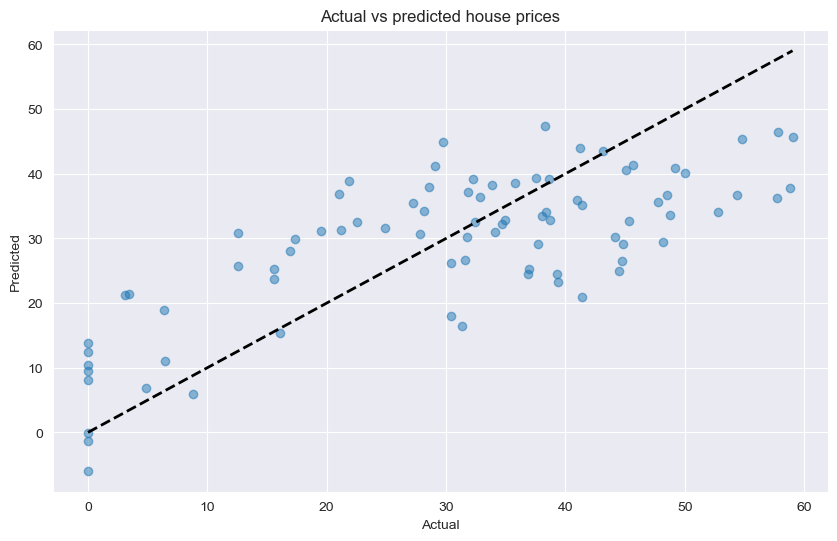

In [77]:
#making predictions using linear regression 
y_pred = model.predict(x_test)

#visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--",lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted house prices")

plt.show()


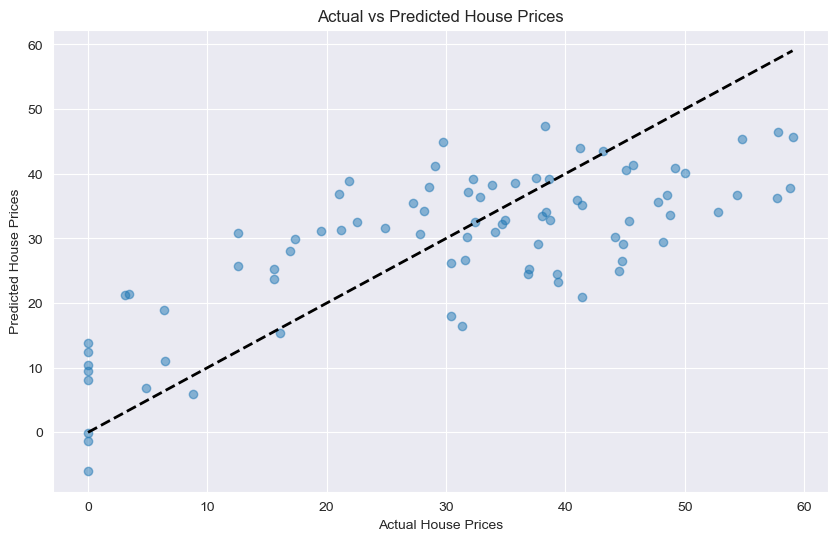

In [78]:
y_pred = model.predict(x_test)

# Visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)  # Changed to max for proper 45-degree line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()



The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

Summary
Real Estate Price Prediction is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions. I hope you liked this article on Real Estate Price Prediction with Machine Learning using Python. Feel free to ask valuable questions in the comments section below

In [81]:
!pip install dash

In [82]:
import dash

In [83]:
from dash import html, dcc, Input, Output, State

In [84]:
#initialize the dash app
app = dash.Dash(__name__)

In [85]:
#Define the layou of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style = {"text-align":"center"}),
        html.Div([
            dcc.Input(id ="distance_to_mrt", type = "number", placeholder ="Distance to MRT station (meters)",
                      style = {"margin":"10px", "padding":"10px"}),
            dcc.Input(id = "num_convenience_stores", type = "number", placeholder = "Number of convenience stores",
                      style = {"margin":"10px", "padding":"10px"}),
            dcc.Input(id = "latitude", type = "number", placeholder = "Latitude",
                      style = {"margin":"10px", "padding":"10px"}),
            dcc.Input(id = "longitude",type = "number",placeholder= "Longitude",
                      style = {"margin":"10px", "padding":"10px"}),
            html.Button("Predict Price", id = "predict_button", n_clicks=0,
                        style = {"margin":"10px", "padding":"10px", "background-color":"#007BFF", "color":"white"}),],
                 style = {"text-align":"center"}),
        html.Div(id = "prediction_output", style = {"text-align":"center","font-size":"20px", "margin-top":"20px"})],
             style = {"width":"50%", "margin":"0auto", "border":"2px solid #07BFF", "padding":"20px", "border-radius":"10px"})])


##define callback to update output
@app.callback(
    Output("prediction_output", "children"),
    [Input("predict_button","n_clicks")],
    [State("distance_to_mrt", "value"),
     State("num_convenience_stores", "value"),
     State("latitude", "value"),
     State("longitude", "value")])

def update_output(n_clicks,distance_to_mrt,num_convenience_stores,latitude,longitude):
    if n_clicks > 0 and all (v is not None for v in [distance_to_mrt,num_convenience_stores,latitude,longitude]):
        #prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt,num_convenience_stores,latitude,longitude]],
                               columns = ["Distance to MRT station", 
                                          "Number of convenience stores",
                                          "Latitude",
                                          "Longitude"])
        
        prediction = model.predict(features)[0]
        return f'predicted house price of unit area: {prediction:.2f}'
    elif n_clicks > 0:
        return "Please enter  all values to get a prediction"
#run the app
if __name__ == "__main__":
    app.run(debug=True)

In [86]:
import dash
from dash import html, dcc, Input, Output, State

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={"text-align": "center"}),

        html.Div([
            dcc.Input(id="distance_to_mrt", type="number", placeholder="Distance to MRT station (meters)",
                      style={"margin": "10px", "padding": "10px"}),

            dcc.Input(id="num_convenience_stores", type="number", placeholder="Number of convenience stores",
                      style={"margin": "10px", "padding": "10px"}),

            dcc.Input(id="latitude", type="number", placeholder="Latitude",
                      style={"margin": "10px", "padding": "10px"}),

            dcc.Input(id="longitude", type="number", placeholder="Longitude",
                      style={"margin": "10px", "padding": "10px"}),

            html.Button("Predict Price", id="predict_button", n_clicks=0,
                        style={"margin": "10px", "padding": "10px", "background-color": "#007BFF", "color": "white"})
        ], style={"text-align": "center"}),

        html.Div(id="prediction_output", style={"text-align": "center", "fontSize": "20px", "margin-top": "20px"})
    ], style={"width": "50%", "margin": "0 auto", "border": "2px solid #007BFF", "padding": "20px", "border-radius": "10px"})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'),
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)

def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]],
                        columns=['Distance to the nearest MRT station',
                                 'Number of convenience stores',
                                 'Latitude',
                                 'Longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run(debug=True)